In [11]:
import torch
import torchvision ## suport para imagens 
import torchaudio


In [12]:
#!pip install --user torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

In [13]:
array = [[1,2,3], [3,2,1]]

tensor = torch.tensor(array)

print(tensor)

tensor([[1, 2, 3],
        [3, 2, 1]])


In [14]:
import numpy as np

np_array = np.array(array)
np_tensor = torch.from_numpy(np_array) 
print(np_array)

[[1 2 3]
 [3 2 1]]


In [15]:
tensor.shape

torch.Size([2, 3])

In [16]:
tensor.dtype

torch.int64

In [17]:
tensor.device

device(type='cpu')

In [18]:
## Aprendizado de maquina profundo requer uma GPU que em recursos de computação paralela, tempos mais rapidos e 
## desempenho

In [19]:
a = torch.tensor([[1,1], [2,2]])
b = torch.tensor([[2,2], [3,3]])

print(a + b)

tensor([[3, 3],
        [5, 5]])


In [20]:
print(a*b)

tensor([[2, 2],
        [6, 6]])


In [21]:
import torch.nn as nn


input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])


In [22]:
linear_layer = nn.Linear(in_features=3, out_features=2)

In [23]:
output = linear_layer(input_tensor)
print(output)

tensor([[0.4262, 0.2906]], grad_fn=<AddmmBackward0>)


In [24]:
linear_layer.weight

Parameter containing:
tensor([[ 0.0086,  0.5553,  0.0612],
        [ 0.2426,  0.0466, -0.4657]], requires_grad=True)

In [25]:
linear_layer.bias

Parameter containing:
tensor([0.1851, 0.0755], requires_grad=True)

#### Qual e a operação usada :
$$
    y_0 = W_0 \cdot X + b_0
$$
* X input array
* W weight (peso)
* b bias (vies)


#### Obs 
* Redes apenas com camadas lineares são chamadas de redes totalmente conectadas

In [26]:
model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18,20),
    nn.Linear(20, 5)
)

In [27]:
input_tensor = torch.tensor([[-0.014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]])

In [28]:
out = model(input_tensor)
print(out)

tensor([[-0.1751,  0.0519, -0.2799, -0.4107, -0.4039]],
       grad_fn=<AddmmBackward0>)


#### Função sigmoid
* Função utilizada para problemas de classificação binária

* Suposição: imagine que você quer classificar um animal se é mamifero ou não. Recebemos 3 informações número de membros se põe ovos e se tem pelos.  

* A função simgoide transforma um número inteiro em um valor entre zero e um.
* Se o valor maior que 0.5 então a resposta sera 1 caso contrario sera 0

$$
    \sigma(x) = \frac{1}{1 + e^{-1}}
$$

##### Obs:
Uma rede neural com camadas lineares é equivalente a uma regressão logística usando aprendizado de maquina tradicional
* Para rotulos de varias classes usamos softmax outra função de ativação
$$
    SoftMax(z)_i = \frac{e^{z^i}}{\sum_{j=1}^{K} e^{z_i}}
$$
$z = (z_1, z_2, ..., z_K) z_i \text{ \space um numero real }$



In [29]:

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


In [30]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

In [31]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

prob = nn.Softmax(dim=-1) ## -1 implica que ele e aplicado a ultima dimensao do input_tensor
output = prob(input_tensor)

print(output)

tensor([[0.1392, 0.8420, 0.0188]])


----

#### Gerações de previsões a partir de modelos. "Executar uma passagem direta"
* Objetivo e propagar os dados de entrada atraves da rede e produzir predições com base nos parâmentros aprendidos peso e vies
* Isso é usado tanto para treinar quanto para gerar novas previsões
* Os resultados pode ser classificações binárias, classificações multiclasse ou previsões numéricas (regressões)
##### Obs :
* retropropagação: é p processo pelo qual os pesos e tendências das camadas são atualizadas durante o treinamento.

#### Loop de treinamento.
1. Propagate
2. Compare
3. BackPropagate
4. Repeat

In [32]:
def generate_list(num):
    import random
    list_rm = list()
    for i in range(num):
        list_rm.append(round(random.uniform(-2, 2), 4))

    return list_rm

In [33]:
generate_list(5)

[-0.8169, 1.1215, -0.1375, -1.9714, -0.5152]

In [34]:
input_data = torch.tensor(
[
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
]
)
print(input_data)

tensor([[-0.1490, -1.4393, -1.9512, -0.3131,  0.0888,  0.9845],
        [-0.8522,  1.3422,  0.8721,  1.5570,  0.8137,  0.7064],
        [-1.5312,  0.0150, -0.0925,  1.2424,  1.9555, -0.3276],
        [ 0.8161,  0.2965,  1.8279, -1.6662, -1.1412, -0.1060],
        [ 1.6988,  0.0210, -1.2614,  1.8759,  1.7935,  0.8096]])


In [35]:
input_data.shape

torch.Size([5, 6])

In [36]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

tensor([[0.6392],
        [0.5419],
        [0.4854],
        [0.5330],
        [0.6357]], grad_fn=<SigmoidBackward0>)


In [37]:
n_class = 3 ## numero de classes da multi class

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4, n_class),
    nn.Softmax(dim=-1)
)

output = model(input_data)
print(output.shape)

torch.Size([5, 3])


In [38]:
print(output)

tensor([[0.1324, 0.4730, 0.3946],
        [0.4071, 0.4985, 0.0945],
        [0.3864, 0.4408, 0.1727],
        [0.4014, 0.4217, 0.1769],
        [0.2241, 0.6592, 0.1166]], grad_fn=<SoftmaxBackward0>)


In [39]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1)

)

output = model(input_data)
print(output)

tensor([[ 0.5454],
        [ 0.9959],
        [ 1.1305],
        [-0.1866],
        [ 0.5337]], grad_fn=<AddmmBackward0>)


#### Avaliar as predições com os valores reais
* Avaliaremos isso com uma função de perda 
* Ele pega uma as previsões do modelo e um valor verdadeiro e gera um float
##### Exemplo:
Digamos que vamos prever com o modelo se um animal é um mamifero um pássaro ou outros.

$$
    loss = F(y, \hat{y}) 
$$
Usamos a codificação one-hot para transformar o inteiro y em um tensor
* Quando $y = 0$ ha três classes ou  seja $\hat{y} = [1,0,0]$

##### Função de perda  entropia cruzada, é a função mais utilizada para problemas de classificação
Função para variaveis class binarias
$$
    CrossEntropyLoss(y, \hat{y}) = - (y \cdot log(\hat{y}) + (1 - y) \cdot log(1 - \hat{y}))
$$
Função para multi class
$$
    CrossEntropyLoss(y, \hat{y}) = - \sum_{i=1}^{C} y_i \cdot log(\hat{y_i})
$$



In [40]:
import torch.nn.functional as F

print(F.one_hot(torch.tensor(0), num_classes=3))
print(F.one_hot(torch.tensor(1), num_classes=3))
print(F.one_hot(torch.tensor(2), num_classes=3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


In [41]:
from torch.nn import CrossEntropyLoss

score = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])

criterion = CrossEntropyLoss()

criterion(score.double(), one_hot_target.double()) ## valor de perda

tensor(0.8131, dtype=torch.float64)

#### Resumo 
* A função de perda toma como entrada o tensor de pontuações que é o modelo
* Ele gera um ponto flutuante da perda da amostra $\newline$
Obs: **O objetivo do treinamento é minimizar a perda.**

In [42]:
y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


---


#### Atualizando os parametros do modelo.

OBS : pensamos na função de perda como uma função "Vale"
* por conta pode existir o minimo local e o minimo global
* e pode existir o maximo global e o maximo local

Deep learning gradient = derivada

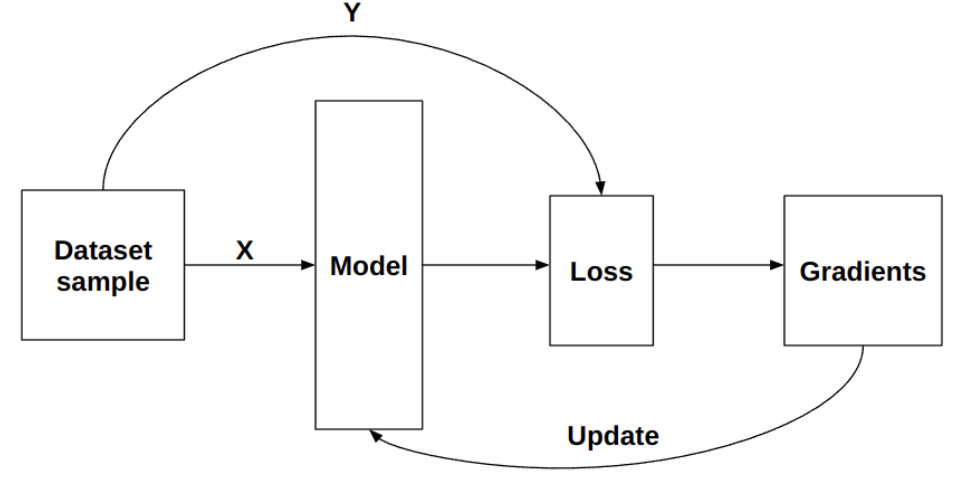

In [43]:
sample = torch.tensor(
[
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
]
)

In [44]:
target = torch.tensor(
[
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2)
]
)

In [45]:
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4), 
    nn.Linear(4,2)
)

prediction = model(sample)

criterion = CrossEntropyLoss() ## Essa função de perda e utilizada em classificações

In [46]:
prediction

tensor([[ 0.1729, -0.3521],
        [ 0.1727,  0.1536],
        [ 0.1065, -0.4186],
        [ 0.2414, -0.1594],
        [ 0.2339, -0.2274]], grad_fn=<AddmmBackward0>)

In [47]:
loss = criterion(prediction, target)

In [48]:
loss.backward()

In [49]:
print(loss)

tensor(0.0213, grad_fn=<DivBackward1>)


In [50]:
model[0].weight.grad, model[0].bias.grad

(tensor([[ 0.0178,  0.0204,  0.0315, -0.0173,  0.0223, -0.0066, -0.0128, -0.0151,
           0.0086,  0.0134,  0.0243,  0.0077, -0.0177,  0.0079, -0.0116, -0.0027],
         [-0.0700, -0.0801, -0.1238,  0.0678, -0.0876,  0.0258,  0.0502,  0.0593,
          -0.0338, -0.0526, -0.0954, -0.0301,  0.0694, -0.0310,  0.0456,  0.0106],
         [ 0.0022,  0.0025,  0.0039, -0.0022,  0.0028, -0.0008, -0.0016, -0.0019,
           0.0011,  0.0017,  0.0030,  0.0010, -0.0022,  0.0010, -0.0014, -0.0003],
         [-0.0935, -0.1070, -0.1654,  0.0906, -0.1170,  0.0345,  0.0671,  0.0793,
          -0.0452, -0.0703, -0.1275, -0.0403,  0.0927, -0.0415,  0.0609,  0.0142],
         [ 0.0716,  0.0819,  0.1266, -0.0694,  0.0896, -0.0264, -0.0514, -0.0607,
           0.0346,  0.0538,  0.0976,  0.0308, -0.0710,  0.0317, -0.0466, -0.0109],
         [-0.0210, -0.0240, -0.0372,  0.0204, -0.0263,  0.0078,  0.0151,  0.0178,
          -0.0102, -0.0158, -0.0286, -0.0090,  0.0208, -0.0093,  0.0137,  0.0032],
         [

In [51]:
model[1].weight.grad, model[1].bias.grad

(tensor([[-0.0234, -0.1011,  0.0240, -0.0664, -0.0695,  0.0017, -0.0265,  0.1024],
         [ 0.0195,  0.0843, -0.0200,  0.0554,  0.0580, -0.0014,  0.0221, -0.0854],
         [ 0.0259,  0.1116, -0.0265,  0.0733,  0.0767, -0.0019,  0.0293, -0.1131],
         [-0.0155, -0.0670,  0.0159, -0.0440, -0.0461,  0.0011, -0.0176,  0.0679]]),
 tensor([ 0.0439, -0.0366, -0.0484,  0.0291]))

In [52]:
model[2].weight.grad, model[2].bias.grad

(tensor([[ 0.0474,  0.0096,  0.0282, -0.1064],
         [-0.0474, -0.0096, -0.0282,  0.1064]]),
 tensor([-0.0998,  0.0998]))

In [53]:
## Atualizando as camadas do modelo

In [54]:
# learning rate is typically small taxa de aprendizado
lr = 0.001

## upadete the weights atualizanfo os pesos
weight = model[0].weight
weight_grad =model[0].weight.grad
weight = weight - lr* weight_grad

In [55]:
# update the biases atualizanfo os vies
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

### OBS matemáticas ....
* Minimizar a função perda o objetivo e encontrar o minimo global.
* Quando temos apenas um minimo global sabemos que nossa função e convexa.
* Qaundo temos varios minimos locais sabemos que nossa função não e convexa.

In [56]:
# Gradiente descendente

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)     ## gradiente estocastico mais conhecido

In [57]:
optimizer.step()

#### Writing our first training loop
1. Criar o modelo
2. Escolher a função perda
3. Criar um dataset
4. Definir um otimizador
5. Percorrer cada elemento do conjunto de dados calcular. (ciclo de treinamento)
    * Perda
    * Clacular os gradientes locais
    * Atualizar os parametros do modelo

OBS: Criamos nosso proprio metodo fit em uma deep learning


------

In [58]:
import pandas as pd


In [59]:
df = pd.read_csv("./data/ds_salaries.csv")

In [60]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [61]:
df = df[["experience_level", "employment_type", "remote_ratio", "company_size", "salary_in_usd"]]

In [62]:
df.head()

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,SE,FT,100,L,85847
1,MI,CT,100,S,30000
2,MI,CT,100,S,25500
3,SE,FT,100,M,175000
4,SE,FT,100,M,120000


In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [64]:
label_encoder = LabelEncoder()
standar_scaler = StandardScaler()
scaler = MinMaxScaler()

## Transformando as variaveis em categoricas Ok
df.experience_level = label_encoder.fit_transform(df["employment_type"])
df.employment_type = label_encoder.fit_transform(df["employment_type"])
df.company_size = label_encoder.fit_transform(df.company_size)


In [65]:
df[["salary_in_usd", "remote_ratio"]] = scaler.fit_transform(
    df[["salary_in_usd", "remote_ratio"]]
)

In [66]:
df

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,2,2,1.0,0,0.181436
1,0,0,1.0,2,0.055900
2,0,0,1.0,2,0.045784
3,2,2,1.0,1,0.381839
4,2,2,1.0,1,0.258207
...,...,...,...,...,...
3750,2,2,1.0,0,0.914581
3751,2,2,1.0,0,0.327891
3752,2,2,1.0,2,0.224489
3753,0,0,1.0,0,0.213250


In [67]:
def mean_square_loss(prediction, target): ## MSE
    from numpy import mean as m
    return m((prediction - target)**2)



In [68]:
## ou entao podemos usar
criterion = nn.MSELoss()
loss = criterion(prediction, target)

In [69]:
features = df[["experience_level", "employment_type", "remote_ratio", "company_size"]].values
target = df[["salary_in_usd"]].values

In [70]:
## Creando o dataset e o dataloader
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(
    torch.tensor(features).float(), torch.tensor(target).float()
)

In [71]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [72]:
## Criando o modelo

model = nn.Sequential(
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

In [73]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [74]:
num_epochs = 5

In [75]:
for epoch in range(num_epochs):
    for data in dataloader:
        ## setar os gradientes
        optimizer.zero_grad()
        ## pegando os pacotes separados nos lotes
        features, target = data
        ## calculando as preds
        pred = model(features)
        ## Computando as perdas e os gradientes
        loss = criterion(pred, target)
        loss.backward()
        ## Atualizando a etapa
        optimizer.step()
        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch: 1/5, Loss: 0.05702848359942436
Epoch: 1/5, Loss: 0.09826479852199554
Epoch: 1/5, Loss: 0.060111694037914276
Epoch: 1/5, Loss: 0.0678747147321701
Epoch: 1/5, Loss: 0.06717713922262192
Epoch: 1/5, Loss: 0.04333248734474182
Epoch: 1/5, Loss: 0.06397487223148346
Epoch: 1/5, Loss: 0.019935451447963715
Epoch: 1/5, Loss: 0.06492345035076141
Epoch: 1/5, Loss: 0.06012555956840515
Epoch: 1/5, Loss: 0.013440266251564026
Epoch: 1/5, Loss: 0.07140210270881653
Epoch: 1/5, Loss: 0.03453478962182999
Epoch: 1/5, Loss: 0.057806432247161865
Epoch: 1/5, Loss: 0.09641067683696747
Epoch: 1/5, Loss: 0.10155430436134338
Epoch: 1/5, Loss: 0.02654285728931427
Epoch: 1/5, Loss: 0.024312280118465424
Epoch: 1/5, Loss: 0.09883097559213638
Epoch: 1/5, Loss: 0.02732667699456215
Epoch: 1/5, Loss: 0.06023645028471947
Epoch: 1/5, Loss: 0.04372798278927803
Epoch: 1/5, Loss: 0.061041686683893204
Epoch: 1/5, Loss: 0.03502108156681061
Epoch: 1/5, Loss: 0.010511609725654125
Epoch: 1/5, Loss: 0.03772110491991043
Epoch:

Epoch: 1/5, Loss: 0.006749791093170643
Epoch: 1/5, Loss: 0.03486727178096771
Epoch: 1/5, Loss: 0.01004727091640234
Epoch: 1/5, Loss: 0.007355629466474056
Epoch: 1/5, Loss: 0.009030179120600224
Epoch: 1/5, Loss: 0.02190639264881611
Epoch: 1/5, Loss: 0.015180024318397045
Epoch: 1/5, Loss: 0.009470746852457523
Epoch: 1/5, Loss: 0.019257359206676483
Epoch: 1/5, Loss: 0.0463741198182106
Epoch: 1/5, Loss: 0.027712959796190262
Epoch: 1/5, Loss: 0.013358344323933125
Epoch: 1/5, Loss: 0.02393767051398754
Epoch: 1/5, Loss: 0.03285139799118042
Epoch: 1/5, Loss: 0.02170288935303688
Epoch: 1/5, Loss: 0.009831451810896397
Epoch: 1/5, Loss: 0.01128952857106924
Epoch: 1/5, Loss: 0.04337803274393082
Epoch: 1/5, Loss: 0.01503289956599474
Epoch: 1/5, Loss: 0.07642859220504761
Epoch: 1/5, Loss: 0.01858590357005596
Epoch: 1/5, Loss: 0.004729330074042082
Epoch: 1/5, Loss: 0.00626685656607151
Epoch: 1/5, Loss: 0.013095961883664131
Epoch: 1/5, Loss: 0.007404469884932041
Epoch: 1/5, Loss: 0.03605971857905388
E

In [76]:
## show_results(model, dataloader) ## depois que terminar o curso criar essa função para descrever o modelo pra mim 

---

### Sigmoid function Limitações
* É limitada entre 0 e 1
* Segue uma destribuição normal (graficamente)

### SoftMax function
* Quando calculamos o gradiente das duas funções elas se aproxima de zero
* Também satura.


Obs: Saturação acontece quando calculamos o gradiente de uma função e idependente dos sua primeira ou enezima gradiente ela converge para zero.
E isso impede que nosso modelo rode $n$ vezes, assim impedindo que o peso seja alterado ou atualizado. (gradiente de fulga)


### Function ReLU
$$ReLU(x)= max(0, x)$$

* Não possui limite superior 
* Os gradientes não convergem para zero o que supera o gradiente de fuga

### Function Leaky ReLU
* Onde a diferença e apenas que para valores negativos ela tem um fato de multiplicação de x

In [77]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)
y.backward()

# Print the gradient of the ReLU function for x
gradient = x.grad
print(gradient)

tensor(0.)


In [78]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


### Arquitetura de modelos
Lembre-se que quando cada neuronio da camada está conectada a cada neuronio da camada anterior chamamos de camadas completamente conectadas. 
Cada neuronio de uma camada linear calculará um operação linear usando todos os neuronios da camada anterior.

Ou seja cada neuronio tem $n+1$ que  e o parametro que pode ser aprendido mais um para o vies.

**Redes Neurais Totalmente Conectadas**

In [79]:
n_features = 8
n_classes = 2

model = nn.Sequential(
    nn.Linear(n_features, 4),
    nn.Linear(4, 2),
)

## Temos duas camadas ocultas nesse modelo



In [80]:
total = 0 
for parameter in model.parameters():
    total += parameter.numel()
print(total)

46


In [81]:
def calculate_capacity(model):
    total = 0
    for p in model.parameters():
        total += p.numel()
    return total

### Otimizador impactando no treinamento
O que controla a inercia do otimizador e o momentum
* Encontrar bons valores para a taxa de aprendizado e o impulso e fundamental para diminuir o tempo de treinamento do modelo ou mau desempenho.
* Um dos maiores desafios e tentar encontrar o minimo de uma função não convexa e ficar preso em um minimo local.

**Resumo**
* Momento: Controla a inercia do otimizador, sem impulso o otimizador pode ficar preso em um otimo local. Ele varia de $0.85$ a $0.99$
* Taxa de aprendizado: lr Tamanho da taxa do peso executado pelo otimizador variam $10^{-2}$ a $10^{-4}$ se a essa taxa for muito alta o otimizador podera nunca conseguir minimizar a função perda. E se tiver muito baixo o trinamento pode demorar mais.


In [82]:
layer = nn.Linear(64, 128)

print(layer.weight.max())
print(layer.weight.min())

tensor(0.1249, grad_fn=<MaxBackward1>)
tensor(-0.1250, grad_fn=<MinBackward1>)


### Obs
Engenheiros de machine learning nunca se baseam por pesos ja inicializados, geralmente utilizam um conceito chamado aprendizado por transferência.
* O conceito se consiste em pegar um modelo treinado em uma tarefa e reutiliza-lo para a segunda tarefa

In [83]:
layer = nn.Linear(64, 128)
torch.save(layer, "layer.pth")

In [84]:
new_layer = torch.load("layer.pth")

* Podemos treinar uma parte so da rede neural
* As camadas iniciais não precisão ser treinadas
* Então podemos optar por congelar elas 

In [85]:
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128,256)
)

for name, param in model.named_parameters():
    if name == "0.weight":
        param.requires_grad = False ## definimos aqui como falso caso quera não carregar o gradiente 0



In [86]:
## ou podemos usar como
for name, param in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name == "0.weight" or name == "0.bias":
        # Freeze the parameters
        param.requires_grad = False

    # Check if the parameters belong to the second layer
    if name == "1.weight" or name == "1.bias":
        # Freeze the parameters
        param.requires_grad = False

In [87]:
nn.init.uniform_(layer.weight)

Parameter containing:
tensor([[0.8619, 0.7154, 0.1086,  ..., 0.3816, 0.5425, 0.2126],
        [0.6017, 0.3698, 0.1405,  ..., 0.1874, 0.8832, 0.8190],
        [0.3402, 0.1036, 0.1456,  ..., 0.7385, 0.8668, 0.2890],
        ...,
        [0.1188, 0.5179, 0.0949,  ..., 0.7750, 0.1203, 0.3434],
        [0.3661, 0.6592, 0.4645,  ..., 0.7458, 0.4171, 0.3171],
        [0.9486, 0.5198, 0.5865,  ..., 0.2267, 0.9688, 0.5751]],
       requires_grad=True)

----

In [88]:
df = pd.read_csv("./data/zoo.csv")

In [89]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [90]:
df = df[["animal_name", "hair", "feathers", "eggs", "milk", "predator", "fins", "legs", "tail", "class_type"]]

In [91]:
import numpy as np

features = df[df.columns[1:-1]]
X = np.array(features).astype(float)
print(X)

[[1. 0. 0. 1. 1. 0. 4. 0.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 4. 0.]
 [1. 0. 0. 1. 1. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 4. 0.]
 [1. 0. 0. 1. 1. 0. 4. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [0. 0. 1. 0. 1. 0. 6. 0.]
 [0. 1. 1. 0. 1. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 0. 1. 0. 0. 0. 6. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [1. 0. 0. 1. 0. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 1. 0. 2. 0.]
 [0. 0. 1. 0. 0. 0. 6. 0.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 2. 0.]
 [0. 1. 1. 0. 1. 0. 2. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 

In [92]:
target = df[df.columns[-1]]
y = np.array(target).astype(float)
print(y)

[1. 1. 4. 1. 1. 1. 1. 4. 4. 1. 1. 2. 4. 7. 7. 7. 2. 1. 4. 1. 2. 2. 1. 2.
 6. 5. 5. 1. 1. 1. 6. 1. 1. 2. 4. 1. 1. 2. 4. 6. 6. 2. 6. 2. 1. 1. 7. 1.
 1. 1. 1. 6. 5. 7. 1. 1. 2. 2. 2. 2. 4. 4. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 7. 4. 1. 1. 3. 7. 2. 2. 3. 7. 4. 2. 1. 7. 4. 2. 6. 5. 3. 3. 4. 1. 1. 2.
 1. 6. 1. 7. 2.]


In [93]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y))

In [94]:
sample = dataset[0]
input_sample, label_sample = sample
print("input sample", input_sample)
print("label_sample", label_sample)

input sample tensor([1., 0., 0., 1., 1., 0., 4., 0.])
label_sample tensor(1., dtype=torch.float64)


In [95]:
batch_size = 2 ## tamanho do lote ## determina o quantas amostras retiramos do conjunto de dados por interação
shuffle = True ## embaralha os dados em cada interação

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [96]:
for batch_inputs, batch_labels in dataloader:
    print("batch input", batch_inputs)
    print("batch labels", batch_labels)
    print("--------------------")

batch input tensor([[0., 0., 1., 0., 1., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 4., 1.]])
batch labels tensor([4., 1.], dtype=torch.float64)
--------------------
batch input tensor([[0., 0., 1., 0., 1., 0., 6., 0.],
        [0., 1., 1., 0., 0., 0., 2., 1.]])
batch labels tensor([6., 2.], dtype=torch.float64)
--------------------
batch input tensor([[0., 1., 1., 0., 0., 0., 2., 1.],
        [1., 0., 0., 1., 1., 0., 4., 1.]])
batch labels tensor([2., 1.], dtype=torch.float64)
--------------------
batch input tensor([[0., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 2., 0.]])
batch labels tensor([4., 1.], dtype=torch.float64)
--------------------
batch input tensor([[0., 1., 1., 0., 1., 0., 2., 1.],
        [1., 0., 0., 1., 1., 0., 4., 1.]])
batch labels tensor([2., 1.], dtype=torch.float64)
--------------------
batch input tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [1., 0., 0., 1., 1., 0., 4., 1.]])
batch labels tensor([1., 1.], dtype=torch.float64)
-------

In [97]:
x, y = next(iter(dataloader)) ## nao sabia
print(x)
print(y)


tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [1., 0., 0., 1., 1., 0., 4., 1.]])
tensor([1., 1.], dtype=torch.float64)


### Métricas de avaliação dos modelos
* Como no aprendizado de máquina, o conjunto de dados de teste é usado apenas uma vez para calcular as métricas finais
* Tranig - 80 - 90 % -> Usado para ajustar os parametros do modelo
* Validation 10 - 20 % -> tunar os hyperparametros
* Testing 5 - 10 % -> usado para calcular as metricas finais

### Calculando a perda no treinamento
* Calculada somando a perda em cada interação do dataloader
* Ao final de cada epoca calculamos o valor médio de perda de treinamento

In [98]:
trainig_loss = 0.0

In [ ]:
for i, data in enumerate(trainsloader):
    ##....

    loss = criterion(output, labels)
    trainig_loss += loss.item()

epoch_loss = trainig_loss / len(trainsloader)

In [ ]:
validation_loss = 0.0
model.eval() ## metodo de avaliacao da classe
## por que  algumas camadas nos modelos de pytorch se comportam de maneira diferentes nos estagios de treinamento e validacao
with torch.no_grad(): ## Indicando que nao vamos fazer calculos de gradientes nessa epoca
    for i, data in enumerate(validationloader, 0):
        ## Run the forward pass  
        ##...
        #..
        #.
        loss = criterion(outputs, labels)
        validation_loss += loss.item()

epoch_loss = validation_loss / len(validationloader) 
model.train() ## indica que colocamos o modelo de volta no modo de treino 

#### OBS
* Assim podemos avaliar se o modelo esta tendo overfitting

**Overfitting**: ocorre quando o modelo para de generalizar o desempenho no conjunto de dados e a validação diminui (ou seja ambas tem que estar andando juntas)

In [100]:
import torchmetrics

In [ ]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)

for i, data in enumerate(dataloader, 0):
    features, labels = data
    output = model(features)

    ## calculando a acurracy
    acc = metric(output, labels.argmax(dim=-1))

acc = metric.compute()

print(f"Accurracy data: {acc}")

## reset na metrica para calcular de novo no proxima epoca

metric.reset()

### Maneiras de combater o overfitting
* O problema do overfitting esta relacionado em memorizar os dados de treinamento
* O que leva bom desempenho nos dados de treinamento mas um desempenho ruim no conjunto de validação
* Um pequeno conjunto de dados pode levar a isso
* Um modelo com muita capacidade ou grandes pesos 
* Para resolver isso podemos reduzir o tamanho do modelo, adicionar uma nova camada chamada de dropout
* Podemos reduzir os pesos os parâmetros para ficarem pequenos
* Podemos obter mais dados aumentando eles com augmenting data

**Dropout: É uma técnica de regularização onde aleatoriamente uma fração de neuronios de entrada são definidos como zero, efetivamente descartamo-os, as conexões são temporariamente removidas** 



In [ ]:
model = nn.Sequential(
    nn.Linear(8, 4),
    nn.ReLU(), 
    nn.Dropout(p=0.5)  ## p indica o valor da probabilidade
)

features = torch.randn((1, 8))

model(i) 

In [106]:
## Outra forma de regularização

optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)  ## weight_decay ele varia entre zero e um
## o peso é subtraido do gradiente durante a retropropagação
## quanto mais auto definimos esse valor, menor sera a probabilidade de nosso modelo, para que o modelo possa generalizar melhor para novos dados

### Steps
1. Criar um modelo que possa ajustar nos demais conjunto de treinamento
2. Definimos uma linha de base para alcançar com o conjunto de validação e assim reduzir o overfitting
3. E finalmente podemos então ajustar os hyperparametros para garantir maior desempehno possivel

In [ ]:
## antes de sobreajustar todo o conjunto de dados de treinamento, é recomendado sobreajustar um único ponto de dados
features, labels = next(iter(trainloader))

for i in range(1e3): ## não interando apenas no sobre o dataloader para poder testar apenas com um ponto de diferenca nos dados
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step

## o overfitting de um unico ponto de dados deve nos dar uma precisão de um e uma perda proxima a zero 
## Tambem ajuda a encontrar possiveis bugs no codigo se esses valores nao forem alcançados
## Nessa fase nao devemos experimentar a arquitetura do modelo

In [111]:
## Se tivermos a capacidade computacional podemos realizar um pesquisa em grade sobre os diferentes hiperparametros

for factor in range(2, 6):
    lr = 10 ** -factor ## feito nos parametros do otimizador como taxa de aprendizado e o impulso
    print(lr)
    print(factor)

0.01
2
0.001
3
0.0001
4
1e-05
5


In [110]:
## Tambem podemos usar uma pesquisa aleatoria que coleta amostras aleatorias de parâmetros entre intervalos
factor = np.random.uniform(2,6)
lr = 10 ** -factor
print(factor)
print(lr)

3.734814186544297
0.00018415597466571148


In [117]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 0.01 and 0.0001
    factor = np.random.uniform(2,4)
    lr = 10 ** -factor
    
    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    
    values.append((lr, momentum))
print(values)

[(0.00020293425935611484, 0.9609826216130108), (0.0013358366332887099, 0.9286957021589338), (0.00041414030302522743, 0.8659182726161213), (0.00010200337664917705, 0.8502143328467219), (0.0008945127633732375, 0.9476334547599924), (0.0029320141754875934, 0.9437448766165514), (0.0001855740748960863, 0.9377017015290997), (0.008401363924163513, 0.8514237472736581), (0.00037253863461034355, 0.9608902775064266), (0.006973885238226284, 0.8958051185078998)]
